# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Dana Ines Romero Bustos
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

In [15]:
from scipy.optimize import newton, bisect
import matplotlib.pyplot as plt
import numpy as np
import math

E = 0.26123110614560324



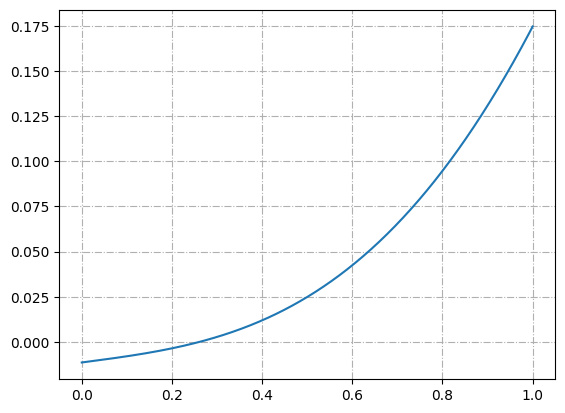

In [2]:
e = 0.9672671
T = 75.96000 # años
t_0 = 1986.1113 # años

M = lambda t: (2 * math.pi / T) * (t - t_0)

def f(E , t):
  '''
  Funcion F(E)
  '''
  return E - (e * np.sin(E)) - M(t)


# Inciso 1, grafica de f(E) para E en [0 , 1]

t_i = 1986.2493   # 1 de abril de 1986 aprox
x = np.linspace(0, 1, 400)
y = f(x , t_i)
plt.plot(x , y)
plt.grid(linestyle= '-.')

# Se emplea el metodo Secante para encontrar E
E_halley = newton(f , 0.2 , x1=0.4 ,  args=(t_i,))
print(f'E = {E_halley}')
print()

Raiz encontrada con secante 1986.2493
Raiz encontrada con newton 1986.2493



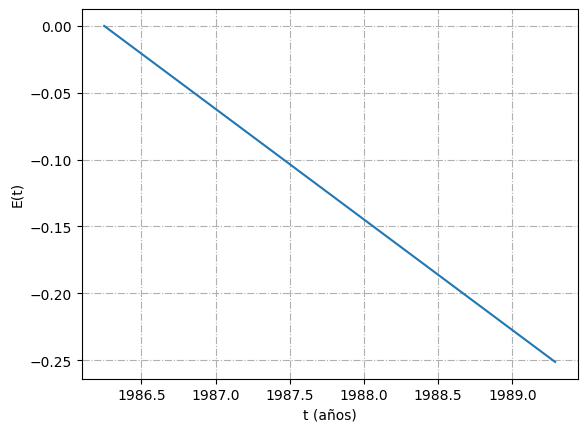

In [3]:
# Inciso 2

E = lambda t: E_halley - e * np.sin(E_halley) - M(t)
dE = lambda t : -(2 * math.pi)/T + (t - t)
delta_t = T/100

raiz_secante = newton(E , 1987 , x1 = 1986.1113)
raiz_newton = newton(E , 1987 , dE)

print(f'Raiz encontrada con secante {raiz_secante}')
print(f'Raiz encontrada con newton {raiz_newton}')
print()

# Graficando
t = np.arange(raiz_newton , 1990 , delta_t)
E_t = E(t)

plt.plot(t , E_t)
plt.xlabel('t (años)')
plt.ylabel('E(t)')
plt.grid(linestyle= '-.')
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Método de Secante: m = 0.9575
Newton-Raphson: m = 0.9575
Método de Punto Fijo: m = 0.9575


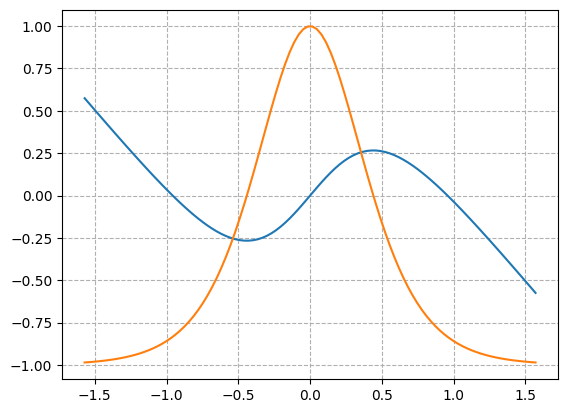

In [4]:
T= 0.5
f = lambda m: np.tanh(m/T) - m # Funcion f(m)
df = lambda m: (1/T) * ((1/np.cosh(m/T))**2) - 1

raiz_secante = newton(f, x0=0.5, x1=0.6)
print(f'Método de Secante: m = {raiz_secante:.4f}')

raiz_newton = newton(f, x0=0.5, fprime=df)
print(f'Newton-Raphson: m = {raiz_newton:.4f}')

# Grafico
x = np.linspace(-np.pi/2, np.pi/2, 100)
y = f(x)
dy = df(x)

plt.plot(x, y)
plt.plot(x, dy)
plt.grid(linestyle='--')

# Metodo de punto fijo

g = lambda m: np.tanh(m / T)  # Reformulación como m = g(m)

def punto_fijo(g, x0, tol=1e-10, max_iter=100):

  for i in range(max_iter):
    x1 = g(x0)

    if abs(x1 - x0) < tol:
      return x1

    x0 = x1
  raise RuntimeError('Se alcanzo el maximo de iteraciones')

m_punto_fijo = punto_fijo(g, x0=0.5)
print(f'Método de Punto Fijo: m = {m_punto_fijo:.4f}')

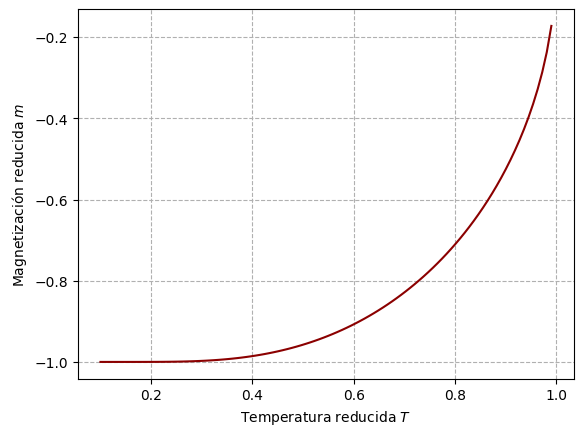

In [5]:
# Grafico de raices para cada T

T_values = np.linspace(0.1 , 0.99 , 100)
raices = []

for T in T_values:
  raices.append(newton(f, -1, x1=-0.5))


plt.plot(T_values, raices, color='darkred')
plt.xlabel('Temperatura reducida $T$')
plt.ylabel('Magnetización reducida $m$')
plt.grid(linestyle='--')
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [3]:
R = 8.314
T0 = 4.444

# Tomamos la funcion f(T) = G + R * T * ln((T/T_0)^(5/2)) para encontrar su raiz
f = lambda T: -1e5 + (R * T * np.log((T/T0)**(5/2)))
TG = newton(f, 800, x1=1000)

print(f'El valor de T para G = -10^5 J es: {TG}')

El valor de T para G = -10^5 J es: 904.9743413388665


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

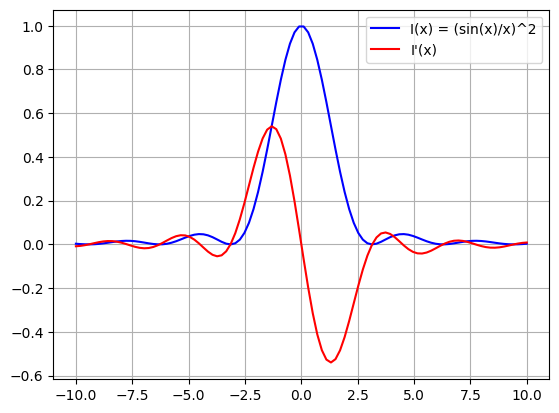

In [18]:
# Inciso 1
I0 = 1

# Funciones del problema
# Usamos np.where para evitar la division por cero y que devuelva el valor de la funcion dada en el problema
I = lambda x: np.where(x == 0, 1, (np.sin(x)/x)**2)
dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)

x = np.linspace(-10, 10, 100)

y = I(x)
dy = dI(x)

# Gráfica
plt.plot(x, y, label='I(x) = (sin(x)/x)^2', color='blue')
plt.plot(x, dy, label="I'(x)", color='red')
plt.grid(True)
plt.legend()
plt.show()


In [12]:
# Inciso 2

f = lambda x: I(x) - I0/2

raiz = newton(f, np.pi, x1= 0)

print(f'Si I(x)={I0}/2 , entonces x = {raiz}')

Si I(x)=1/2 , entonces x = 1.3915573782515098


<ipython-input-11-4653524880cc>:6: RuntimeWarning: invalid value encountered in scalar divide
  I = lambda x: np.where(x == 0, 1, (np.sin(x)/x)**2)


In [13]:
# Inciso 3
max_locales = newton(dI, -7.6, x1=-7.4), newton(dI, -5, x1= -4.5), newton(dI, -1, x1= 1), newton(dI, 4.5, x1= -5), newton(dI, 7.4, x1= -7.4)

print(f'Los maximos locales en el intervalo [-10, 10] son: \n{max_locales}\n')

Los maximos locales en el intervalo [-10, 10] son: 
(np.float64(-7.725251836937708), np.float64(-4.493409457909064), np.float64(0.0), np.float64(-20.37130295928756), np.float64(0.0))



<ipython-input-11-4653524880cc>:7: RuntimeWarning: divide by zero encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)
<ipython-input-11-4653524880cc>:7: RuntimeWarning: invalid value encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)


In [14]:
# Inciso 4

def regula_falsi(f, a, b, tol= 1e-7, max_iter= 1000):
  '''
  Calcula la raiz de f, partiendo de a y b tq f(a) y f(b) tengan signos distintos
  '''

  if f(a)*f(b) > 0:
    raise RuntimeError('f(a) y f(b) deben ser de signos distintos')

  for n in range(max_iter+1):

    c = (a*f(b) - b*f(a))/(f(b) - f(a))

    if abs(f(c)) < tol:
      return c
    elif f(c)*f(a) < 0:
      b = c
    else:
      a = c

  raise RuntimeError('Maximo de iteraciones alcanzado')


# Calcular en los intervalos
h = 0.5

intervalos = np.arange(-10, 10.5, h)

print(f'Las raices de dI son:')

for i in intervalos:
  dIi = dI(i)
  dIi1 = dI(i+h)

  if dIi*dIi1 < 0:
    print(f'x = {regula_falsi(dI, i, i+h)}')

Las raices de dI son:

x = -9.424778908059865
x = -7.725251879794755
x = -6.283186576357559
x = -4.4934100239108865
x = -3.1415928257927983
x = 3.1415928257927983
x = 4.4934100239108865
x = 6.283186576357559
x = 7.725251879794755
x = 9.424778908059865


<ipython-input-11-4653524880cc>:7: RuntimeWarning: divide by zero encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)
<ipython-input-11-4653524880cc>:7: RuntimeWarning: invalid value encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

In [16]:
h = 6.626e-34   # Constante de Planck
c = 2.998e8     # Velocidad de la luz
k_B = 1.381e-23 # Constante de Boltzmann

def ley_planck(landa, T):
  '''
  landa: longitud de onda
  T: temperatura
  Retorna: densidad espectral de energía
  '''
  return (8 * np.pi * h * c) / (landa**5 * (np.exp(h * c / (landa * k_B * T)) - 1))

def derivada_planck(lam, T):
  '''
  Derivada de la ley de planck
  '''

  landa_0 = h * c / (k_B * T)
  x = lam / landa_0

  # Numerador y denominador de la fórmula dada
  num = 5 * x + (1 - 5 * x) * np.exp(1/x)
  den = x**7 * (np.exp(1/x) - 1)**2
  K = 8 * np.pi * h * c
  return K * landa_0 * num / den

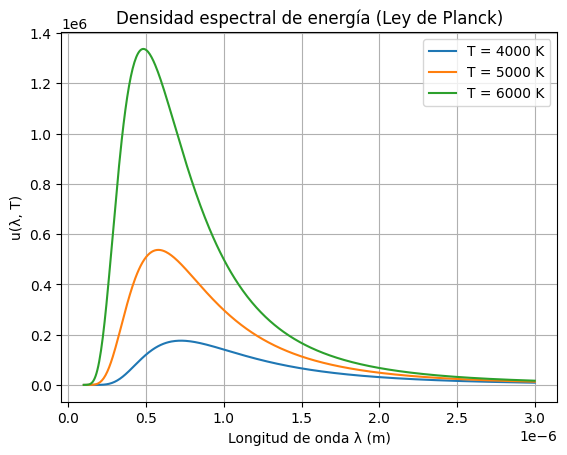

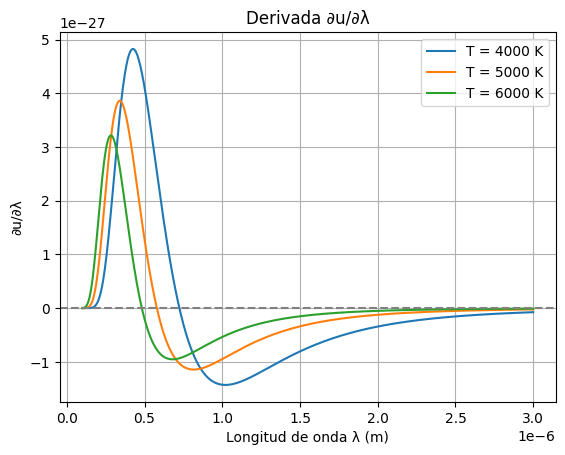

In [33]:
# Inciso 1

# Longitudes de onda en metros
landa = np.linspace(1e-7, 3e-6, 500)

# Temperaturas a graficar
temperatura = [4000, 5000, 6000]

# Gráfica de u(λ, T)

for T in temperatura:
  plt.plot(landa, ley_planck(landa, T), label=f"T = {T} K")  # Convertimos λ a nm solo para el eje x

plt.title("Densidad espectral de energía (Ley de Planck)")
plt.xlabel("Longitud de onda λ (m)")
plt.ylabel("u(λ, T)")
plt.grid(True)
plt.legend()
plt.show()

# Gráfica de la derivada ∂u/∂λ

for T in temperatura:
    plt.plot(landa, derivada_planck(landa, T), label=f"T = {T} K")

plt.axhline(0, color='gray', linestyle='--')
plt.title("Derivada ∂u/∂λ")
plt.xlabel("Longitud de onda λ (m)")
plt.ylabel("∂u/∂λ")
plt.grid(True)
plt.legend()
plt.show()


In [34]:
# Inciso 2

T = 5778

# Función raíz
f = lambda landa: derivada_planck(landa, T)

# Intervalo donde hay cambio de signo
max_bisec = bisect(f, 4e-7, 6e-7)
max_newton = newton(f, x0=4e-7)

print(f"Raíz (máximo) por Bisección: λ = {max_bisec:.4e} m")
print(f"Raíz (máximo) por Newton: λ = {max_newton:.4e} m")

Raíz (máximo) por Bisección: λ = 5.0140e-07 m
Raíz (máximo) por Newton: λ = 1.0040e-04 m


In [35]:
# Inciso 3
wien_bisec = max_bisec * T
wien_newton = max_newton * T

print(f"λ_max * T (Bisección) = {wien_bisec:.4e} m·K")
print(f"λ_max * T (Newton) = {wien_newton:.4e} m·K")
print("Valor esperado ≈ 2.898e-3 m·K")

λ_max * T (Bisección) = 2.8971e-03 m·K
λ_max * T (Newton) = 5.8011e-01 m·K
Valor esperado ≈ 2.898e-3 m·K


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

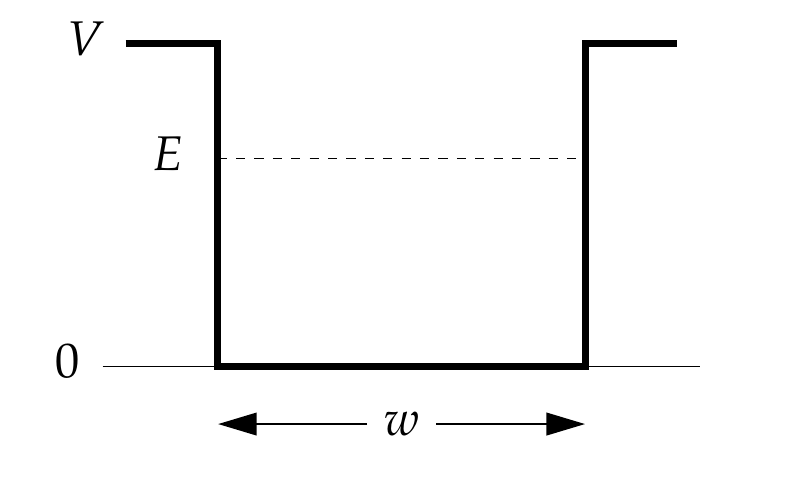

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

<ipython-input-48-4dcfa642918b>:12: RuntimeWarning: divide by zero encountered in divide
  y2 = lambda E : np.sqrt((V - E)/E)
<ipython-input-48-4dcfa642918b>:13: RuntimeWarning: divide by zero encountered in divide
  y3 = lambda E : - np.sqrt(E / (V - E))


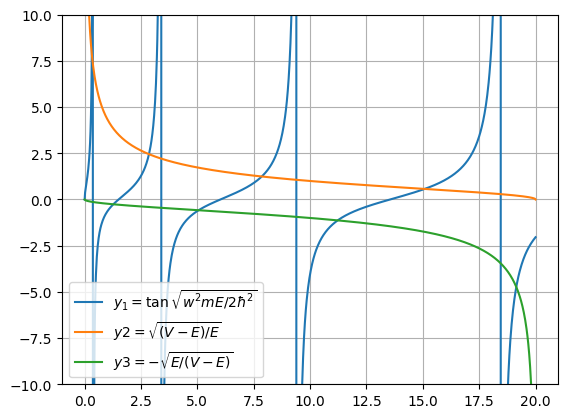

In [48]:
# Constantes que usaremos
m = 9.11e-31     # Masa del electrón en kg
h = 1.055e-34    # Constante de Planck
eV = 1.602e-19   # Conversión de eV a J
V = 20 * eV      # Altura del pozo en J (20 eV)
w = 1e-9         # Ancho del pozo en metros (1 nm)

# Inciso 1

# Funciones
y1 = lambda E : np.tan(np.sqrt(w**2 * m * E / (2 * h**2)))
y2 = lambda E : np.sqrt((V - E)/E)
y3 = lambda E : - np.sqrt(E / (V - E))

# Rango de energías de 0 a V 20 eV
E_vals = np.linspace(0, 20 * eV, 1000)

Y1_vals = y1(E_vals)
Y2_vals = y2(E_vals)
Y3_vals = y3(E_vals)

# Graficamos
plt.plot(E_vals / eV, Y1_vals, label=r'$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}$')
plt.plot(E_vals / eV, Y2_vals, label=r'$y2 = \sqrt{(V - E)/E}$')
plt.plot(E_vals / eV, Y3_vals, label=r'$y3 = -\sqrt{E / (V - E)}$')
plt.ylim(-10, 10) # limitamos los valores en y sino el eje y se extiende hasta cantidades muy grandes y daña la vista de la gráfica
plt.legend()
plt.grid()
plt.show()


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [49]:
# Constantes

G = 6.674e-11  # Constante grabitacional
M = 5.974e24   # Masa de la Tierra
m = 7.348e22   # Masa de la Luna
R = 3.844e8    # Distancia Tierra-Luna
w = 2.662e-6   # Velocidad angular

# Funcion f(r) a la que se encontrara su raiz para encontrar L1
f = lambda r : (G * M / r**2) - (G * m / (R - r)**2) - (r * w**2)

# Usar método de la secante
r_l1 = newton(f, x0=1e7, x1=1.5e8)

print(f"Raíz (posición de L1) usando método de la secante: r = {r_l1:.4e} m")

Raíz (posición de L1) usando método de la secante: r = 3.2605e+08 m
